<a href="https://colab.research.google.com/github/rohan-jagtap04/Passion_Project/blob/master/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4630 - accuracy: 0.8678
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1086 - accuracy: 0.9663
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.9660
Accuracy: 0.10904162377119064
Loss: 0.9660000205039978
INFO:tensorflow:Assets written to: digits.model/assets
The model predicted: 2


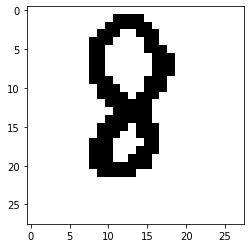

The model predicted: 3


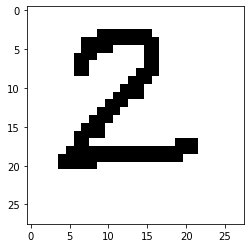

The model predicted: 3


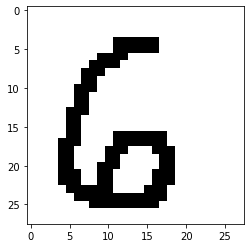

The model predicted: 3


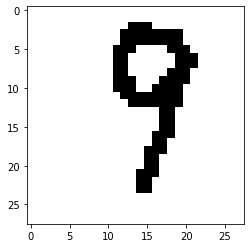

In [15]:
#from https://www.youtube.com/watch?v=Zi4i7Q0zrBs
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
#data set w/ hand written digits
mnist = tf.keras.datasets.mnist

#split into test/train data
(x_train,y_train),(x_test, y_test) = mnist.load_data()

#scale down inputs (normalize them) either rbg (0-255) -> (0-1)
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#tells compiler that we're creating an ordinary feed-forward neural network
model = tf.keras.models.Sequential()

#Since our input will be 28x28 grid, were flattening it to be (28^2, 1) and specifying what our input looks like
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

#Specifying how many neurons we want to have (more neuron = more sophistication + nuances we can account for)
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))

#we have ten outputs (0,1,2,3,4,5,6,7,8,9)
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

accuracy, loss = model.evaluate(x_test, y_test)
print("Accuracy: " + str(accuracy))
print("Loss: " + str(loss))

model.save('digits.model')

for x in range(1,5):
  img = cv.imread(f'{x}.png')[:,:,0]
  img = np.invert(np.array([img]))
  prediction = model.predict(img)
  print(f'The model predicted: {np.argmax(prediction)}')
  plt.imshow(img[0], cmap=plt.cm.binary)
  plt.show()
